PROJECT - PREDICTING HOUSING PRICES

A virtual environment will be cretaed using Poetry and the packages needed throughout the project will be added. 
In this project Poetry + Pyenv is used for managing the different evrsions of Python as well as to keep track of many dependencies needed in the project. 
Problem: Tensorflow required a different version of Python and Numpy than the ones being currently used. With the help of Poetry + Pyenv problem was solved. 

Steps to create a virtual environemnt and to install dependencies: 
1. Find the path of your document (type "pwd" on terminal)
2. Type "poetry init" to initialize the project
3. Type "Poetry shell" to activate the virtual environment
4. Choose the new VE from "select kernel" on up right corner
5. Add dependencies using "poetry add" (you can check the packgages and their versions from your pyproject.toml file) * in this case one doesn't need to run poetry install command since when poetry add is used it also installs automatically

In [141]:
# A test to see if imported package is working
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
print(arr)

[1 2 3 4 5]


After setting up the project envrionment, next step is to download the dataset from Kaggle

In [142]:
import pandas as pd
train_set = "/Users/serraus/Desktop/house-prices-advanced-regression-techniques/train.csv"
train_data = pd.read_csv(train_set)

#test_set = "/Users/serraus/Documents/GitHub/ML_Project_Housing_Prices/dataset/test.csv"
#test_data = pd.read_csv(test_set)


* The data set has 1460 rows and 81 columns. If the "Id" column is excluded, there are 79 different features, which are qualities of a hosue in Iowa region, in this dataset which might effect the target which is the "SalePrice" of a house. 
* The test_data consists of exact same features. The SalePrice column is missing however so that one can test the created models accuracy.
* The data consists of categorical data like in the "Street" column as well as numerical data as in for example "LotArea" column.
* The data looks dirty since there are some "NaN" values in columns like "Alley". 

Seeing some statistics helps to understand the data more. Running the .describe() command will show some meaningful values. 

In [143]:
print(train_data.SalePrice.describe()) #to see descriptive statistics 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Mean price of a house is around 181 000 dollars. This number will be compared with the errors of the models later on.

In [144]:
import pandas as pd
train_data.set_index("Id", inplace=True) #Id column is set as the new name for the rows, inplace = True allows the DataFrame to be updated

In [ ]:
print(train_data)

This is done since id column itself is not useful in statistical measures however, it's good for identifiying each house.

In order to have some visualization a random feture is picked and it's relationship with the target "SalePrice" is analyzed in a regression graph.
LotArea is picked as the feature in other words x value and SalePrice will be y.

<Axes: xlabel='LotArea', ylabel='SalePrice'>

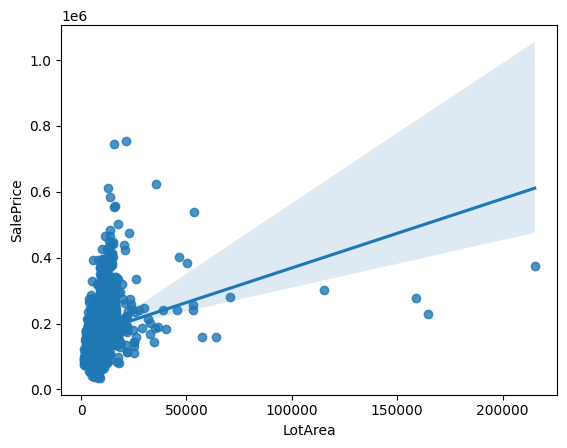

In [146]:
import seaborn as sns #seaborn is the library that will be used for graphs
sns.regplot(x = train_data["LotArea"], y = train_data["SalePrice"]) #regplot is for a regression graph

This graph is badly scaled since SalePrice values are much larger than LotArea values. But as a general comment one can say that it seems like as the LotArea increases SalePrice tend to increase.
The graph also shows possible outliers in the data that should be dealt with such as the 200000 LotArea value that makes the best fit line go less steep.

Identifying the distribution type of some columns first will be helpful to decide what to do with the outliers. Drawing a histogram of data columns will be helpful to visualize distributions.

<Axes: xlabel='LotArea', ylabel='Count'>

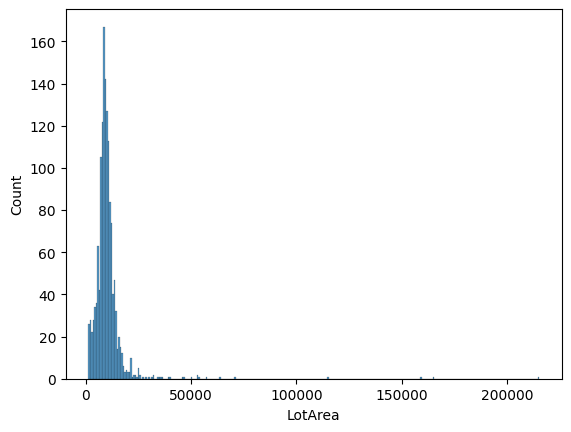

In [147]:
sns.histplot(train_data["LotArea"])

Outliers are also visible in the histogram plot. This column and many others do not seem to be normally distributed therefore when one uses ceratain ML algorithms this will cerate a problem since many of them assume normal distribution. 

After looking at the data in detail, one needs to first clean it so that the machine learning models can perform better and faster.

One can perform data cleaning in many different ways:
1. Deleting rows that have missing values (This method is hardly ever accepted as this possibly deletes every row in our data set)  
2. Deleting columns that have missing values (This method works much better than number 1 but still causes possible losses in data that might be important)
3. Imputation (This method is where missing values are replaced with a number, this method sometimes helps and is much better than 1 and 2) 
*To apply imputation one should only have numeric values

In [ ]:
train_data.dropna() #method 1

As expected this resulted in all rows deleted since there is at least one NaN value in each row. This will not be used.

In [ ]:
def delete_columns(data): #method 2
    deleted_columns_data = data.dropna(axis = 1)
    return deleted_columns_data
delete_columns(train_data)

In [150]:
#to see which columns got deleted
def info_columns_deleted(data):
    original = data.columns
    new = data.dropna(axis= 1).columns
    removed_columns = list(set(original) - set(new))
    print("Number of columns removed: ", len(removed_columns))
    return removed_columns
info_columns_deleted(train_data)


Number of columns removed:  19


['MasVnrArea',
 'BsmtCond',
 'GarageType',
 'MiscFeature',
 'GarageQual',
 'Electrical',
 'BsmtFinType1',
 'Alley',
 'BsmtFinType2',
 'GarageFinish',
 'LotFrontage',
 'PoolQC',
 'Fence',
 'BsmtQual',
 'GarageYrBlt',
 'FireplaceQu',
 'BsmtExposure',
 'GarageCond',
 'MasVnrType']

Some of these values could be crucially important to define the SalePrice of a house. This method will also not be preferred.

Before applying method 3 one needs to decide what to do with categorical data. There are 3 ways one can deal with categorical data:
1. Delete columns with categorical data (Like before causes loss of data)
2. Apply ordinal encoding (This is where each word in the column gets assigned a number) 
3. Apply one-hot encoding (This is where each word in the column gets its own new column and value of 1 or 0 is used for each row - 1 indicating it's present 0 it's not present -)

NOTE: Method 3 will not be tried since there are 24 columns with categorical data each having different categroies. This would result in so many new columns of data which in turn actually results in less optimal results. 

In [ ]:
train_data.select_dtypes(exclude = "object") #method 1 
#this method also deletes columns with NaN values

In [152]:
def ordinal_encoder(data): #method 2
    from sklearn.preprocessing import OrdinalEncoder 
    label_data  = data.copy()
    object_columns = [col for col in label_data.columns if label_data[col].dtype == "object"]
    label_data[object_columns] = OrdinalEncoder().fit_transform(data[object_columns])
    return label_data
encoded_train_data = ordinal_encoder(train_data)
#encoded_test_data = ordinal_encoder(test_data)


After applying ordinal encoding, only numerical data is present in the dataset which in turn allows imputing to be applied. 

In [ ]:
def imputer(data): #method 3
    from sklearn.impute import KNNImputer
    knn_imputer = KNNImputer(n_neighbors = 5) #it will look at 5 values next to it 
    imputed_data = pd.DataFrame(knn_imputer.fit_transform(data))
    imputed_data.columns = data.columns 
    return imputed_data
imputed_train_data = imputer(encoded_train_data)
#imputed_test_data = imputer(encoded_test_data)
print(imputed_train_data)

Next step is to apply logarithmic transformation to the dataset since as mentioned before many columns in the data are not normally distributed. 

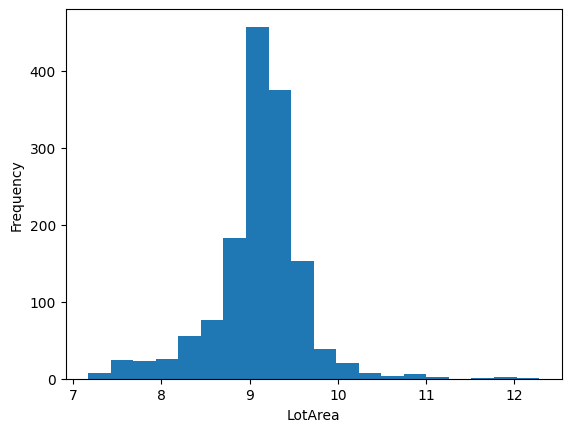

In [154]:
import numpy as np
import pandas as pd

log_transformation = np.log(imputed_train_data + 1)  # Adding 1 to handle zero values

log_transformed_data = pd.DataFrame(log_transformation, columns=imputed_train_data.columns)

plt.figure()
plt.hist(log_transformed_data["LotArea"], bins=20)
plt.xlabel("LotArea")
plt.ylabel("Frequency")
plt.show()

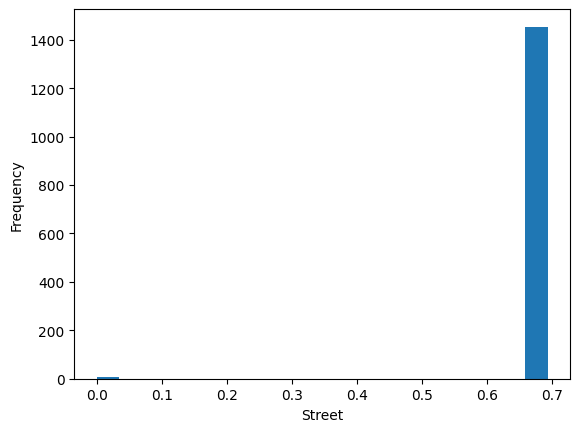

In [155]:
plt.figure()
plt.hist(log_transformed_data["Street"], bins=20)
plt.xlabel("Street")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print(log_transformed_data)

Applying logarithmic transformation did help to turn some columns to normal distribution. However there are still columsn like the "Street" column where it's not possible to make data closer to normal distribution due to the column values being centered in one value the reason being transforming the categorical street values into numerical ones. 

----------------------------------------

Data preprocessing/cleaning helps machine learning models to become more accurate. Next step is feature engineering where valuable features are selected from the data set and unwanted ones are excluded. In addition new features could also be created by combining existing ones which also helps the machine learning model to work faster since the dataset will be less complex and also become more accurate. 

There are different methods that can be applied: 
1. Calculating Mutual Information Scores (This is a function that measures the relationship with a feature and the target in terms of uncertainty)
2. Creating Features (Combining existing fetaures with a certain aggregation function)


NOTE: There are more feature engineering techniques which can be applied to categorical data. However in this project it is decided that only numerical values will be used. Because the algorithms that will be used generally work well with numerical data.

In [157]:
from sklearn.feature_selection import mutual_info_regression
x = log_transformed_data
y = log_transformed_data["SalePrice"]
def mi_scores(x, y): #one can make a function so that one doesn't need to copy the code over and over again if needed to be sued
    mi = mutual_info_regression(x, y)
    mi = pd.Series(mi, index = x.columns) #to create a table looking output to see mi scores for each column by name
    mi = mi.sort_values(ascending = False) #highest mi scored values will be on top
    return mi
mi = mi_scores(x, y)
mi.head(10) #to see top 10 highest mi scores


SalePrice       5.621830
Alley           1.142061
Fence           0.876790
MiscFeature     0.769318
FireplaceQu     0.571221
OverallQual     0.564252
Neighborhood    0.516590
GrLivArea       0.479197
MasVnrType      0.474883
GarageCars      0.358777
dtype: float64

Alley of a house is the feature with the highest MI score. This means that knowing the alley data will tell the most about SalePrice. It will reduce the uncertainty in SalePrice the most. The second most valuable feature is the Fence of the house. It is important to note that although a feature has a low MI score when combined with another might indeed tell a lot about the target.
#graph???????#

New features that will be created might have higher scores. 

New features: 
- Age of the House (AgeHouse) since age of the house can tell a lot about the sale price. 
- Total Sqaure Footage (TotalSF) since total area of the house instead of individual areas of rooms and basement might be more important and can help machine learning model to work faster. 
- Whether the hosue has a pool or not (HasPool) since pools are known to add value to a house. This will be a 1 or 0 (boolean) data. 

In [158]:
def new_features(data):
    data['AgeHouse'] = data['YrSold'] - data['YearBuilt']
    data['TotalSF'] = data['1stFlrSF'] +  data['2ndFlrSF'] + data['TotalBsmtSF']
    data['HasPool'] = [1 if area > 0 else 0 for area in data['PoolArea']]
    new_data = data[['AgeHouse', 'TotalSF', 'HasPool']]
    return new_data
new_train_data_features = new_features(log_transformed_data)
new_test_data_features = new_features(log_transformed_data)
print(new_train_data_features)

      AgeHouse    TotalSF  HasPool
0     0.002492  20.257977        0
1     0.015559  14.282490        0
2     0.003490  20.415959        0
3     0.046401  20.127741        0
4     0.003990  21.048414        0
...        ...        ...      ...
1455  0.003992  20.265239        0
1456  0.016040  14.978718        0
1457  0.034914  21.181113        0
1458  0.030290  13.967580        0
1459  0.021636  14.272966        0

[1460 rows x 3 columns]


In the next step MI scores of the new features will be calculated. The expectation is that they get a higher MI score than the individual MI scores that make up the new feature. 

In [159]:
new_mi = mi_scores(x, y)
new_mi.head(20)


SalePrice       5.609243
Alley           1.141749
Fence           0.871507
MiscFeature     0.778452
TotalSF         0.704848
OverallQual     0.567782
FireplaceQu     0.567780
Neighborhood    0.512680
GrLivArea       0.476775
MasVnrType      0.467438
GarageCars      0.363919
YearBuilt       0.355426
TotalBsmtSF     0.343987
GarageArea      0.337801
AgeHouse        0.329631
BsmtQual        0.326305
ExterQual       0.325265
KitchenQual     0.325167
GarageYrBlt     0.303202
1stFlrSF        0.301002
dtype: float64

Total Square Footage got a high MI score, higher than the features that create it. 
Age of the House scored lower than the year built, however higher than the year sold which is a feature that makes it. 
HasPool not ended up in the lists. This may be due to other factors such as many houses in the region not having a pool. 

In [160]:
print(log_transformed_data['HasPool'].sum()) #to see number of houses with a pool in data set


7


As expected the numbers are too low that it cannot contribute to the statistics. 

In [161]:
new_mi.tail(20) #to see last 20 values

Condition1       0.015690
EnclosedPorch    0.014976
ExterCond        0.013029
BsmtHalfBath     0.012702
Heating          0.011700
RoofMatl         0.007889
Street           0.007271
RoofStyle        0.005676
LandSlope        0.005346
MiscVal          0.005202
LowQualFinSF     0.004822
Functional       0.003947
3SsnPorch        0.001251
BsmtFinSF2       0.000772
Utilities        0.000704
YrSold           0.000000
MoSold           0.000000
Condition2       0.000000
PoolArea         0.000000
HasPool          0.000000
dtype: float64

Last 15 values received a really low MI score (0.00 ...) especially the last 5 which all received a score of 0. This means that knowing those features does not make one more confident about the target. Although one should not rely merely on MI scores since some of these features when combined with others may become useful, in this model the aim is also to make the model become computationally more efficient and since the scores are too low they will be discarded from the actual dataset. 


In [ ]:
columns_to_be_removed = [
    'Street',
    'RoofStyle',
    'BsmtHalfBath',
    'RoofMatl',
    'LowQualFinSF',
    'BsmtFinSF2',
    'MiscVal',
    'PoolArea',
    '3SsnPorch',
    'HasPool',
    'YrSold',
    'LandSlope',
    'MoSold',
    'Utilities',
    'Condition2'
]
log_transformed_data.drop(columns=columns_to_be_removed, inplace=True) #inplace = True modifies the original DataFrame
print(log_transformed_data)

------------------------------------------

After the data set has been prepared, it's now ready to be used in various machine learning algorithms and neural networks. One should split the data into training and validation sets first. 

In [163]:
#def outlier_remover(columns):
    #for column_name in columns.columns:
        #column = columns[column_name]
        #q1 = column.quantile(0.25)
        #q3 = column.quantile(0.75)
        #iqr = q3 - q1
        #outlier1 = q1 - (iqr * 1.5)
        #outlier2 = q3 + (iqr * 1.5)

        # Identify and remove rows containing outlier values from the column
        #mask = (column < outlier1) | (column > outlier2)
        #columns = columns[~mask]

    #return columns
#outlier_remover(imputed_train_data)


In [ ]:
X = log_transformed_data.drop("SalePrice", axis = 1)
y = log_transformed_data.SalePrice
print(X, y)

In [165]:
#Splitting the data into train/validation sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 
#test size means that the data will be splitted as 80% training 20% validation set
#setting random state into a fixed number ensures the same result is obtained when the code is run again


One can apply some form of scaling to features to better assist ML models. 

NOTE: Different scaling methods (RobustScaling, MinMaxScaling, MaxAbsScaler etc.) were tried with the main aim of reducing the error in XGBoost algorithm since that is the one which is thought to be the best algorithm. StandardScaler turned out to give the least mean absolute error. 
In addition since now data is assumed to be normally distributed StandardScaler can work well.


In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)


3 Machine Learning Algorithms to be tested are: 
1. Linear Regression (One of the simplest algorithms that could be used, where the relationship between the features and the target is linearly modelled.)
2. XGBoost Regressor (An algorithm that both chooses the "optimal gradient" as well as being efficient. This algorithm is very famous with it's accurate results therefore it has been chosen.)
3. ElasticNet Regression (An algorithm that combines L1 and L2 regularization. It's a balance between the both. L1 regularization helps with feature selection whereas L2 regularization prevents overfitting. They are also both good at handling multicolinearity. Therefore it's expected to fit the dataset.) 

In [175]:
#linear regression - method 1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
score = mean_absolute_error(y_valid, y_pred)
score2 = r2_score(y_valid, y_pred)
print("Mean Absolute Error:", score)
print("R^2 score:", score2)

Mean Absolute Error: 0.0915403898214309
R^2 score: 0.8982963156644939


Closer the R^2 value to 1, better fit the model is. This number is not the optimal.

In [177]:
#XGBoost - method 2
from xgboost import XGBRegressor

XGBRegressor().fit(x_train, y_train)
model = XGBRegressor(
    n_estimators=430, #number of trees that the model builds, it should be not too high not too low
    learning_rate=0.1, #step-size, used to prevent overfitting, it should be not too lare not too low
    max_depth=4, #maximum depth of a tree
    subsample=0.8, #fraction of samples used for training each tree
    )
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
score = mean_absolute_error(y_valid, y_pred)
score2 = r2_score(y_valid, y_pred)
print("Mean Absolute Error:", score)
print("R^2 score:", score2)

Mean Absolute Error: 0.0682104108405523
R^2 score: 0.9297708584920662


This model received a high R^2 score. This could be improved with GridSearch and algorithm used to estimate the hyperparameters.

In [179]:
from sklearn.model_selection import GridSearchCV

hyperparameter_grid = {
    'n_estimators' : [50, 100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'max_depth' : [5,7,9],
    'subsample' : [0.4,0.6,0.8,1.0]
}
model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=hyperparameter_grid, cv=5, scoring='neg_mean_absolute_error')
#negative MAE is used because the algorithm is trying to minimize the error
#cv stands for cross validation - which is a technique were data is split into smaller subsets and each of them is tried along the training. 

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

In [180]:
print(best_params)
print(best_xgb_model)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [185]:
#XGBoost - new values
from xgboost import XGBRegressor
XGBRegressor().fit(x_train, y_train)
model = XGBRegressor(
    n_estimators=200, #number of trees that the model builds, it should be not too high not too low
    learning_rate=0.1, #step-size, used to prevent overfitting, it should be not too lare not too low
    max_depth=5, #maximum depth of a tree
    subsample=1.0, #fraction of samples used for training each tree
    random_state = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
score = mean_absolute_error(y_valid, y_pred)
score2 = r2_score(y_valid, y_pred)
print("Mean Absolute Error:", score)
print("R^2 score:", score2)

Mean Absolute Error: 0.07202571615211653
R^2 score: 0.9224974145889058


GridSearch resulted in a close score to the score genearted by hand.

In [172]:
#ElasticNet regression - method 3
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 1.0, #controls regularization strength
l1_ratio = 0.7, #makes a mix of l1 and l2 regularization
random_state = 10) 
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
score = mean_absolute_error(y_valid, y_pred)
score2 = r2_score(y_valid, y_pred)
print("Mean Absolute Error:", score)
print("R^2 score:", score2)

Mean Absolute Error: 0.33713389241665187


These parameters are hypertuned by trial-error method since it's seen that using methods like grid search require high computational power. 

After trying out some machine learning algorithms one can try another machine learning concept called neural netwroks to try to predict the sale price of a house. Neural Networks are series of interconnected layers and nodes that transfer information from one another and make use of mathematical functions to generate an output. 

Epoch 1/100
37/37 [==============================] - 2s 11ms/step - loss: 12.6807 - val_loss: 10.9522
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 7.3796 - val_loss: 4.1810
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 3.1703 - val_loss: 2.4837
Epoch 4/100
37/37 [==============================] - 0s 6ms/step - loss: 2.2568 - val_loss: 2.2191
Epoch 5/100
37/37 [==============================] - 0s 9ms/step - loss: 1.9801 - val_loss: 2.0160
Epoch 6/100
37/37 [==============================] - 1s 16ms/step - loss: 1.7993 - val_loss: 1.9387
Epoch 7/100
37/37 [==============================] - 0s 7ms/step - loss: 1.6747 - val_loss: 1.7738
Epoch 8/100
37/37 [==============================] - 0s 5ms/step - loss: 1.5460 - val_loss: 1.6716
Epoch 9/100
37/37 [==============================] - 0s 6ms/step - loss: 1.4562 - val_loss: 1.6092
Epoch 10/100
37/37 [==============================] - 0s 10ms/step - loss: 1.3484 - val_loss: 1.5595
Epoc

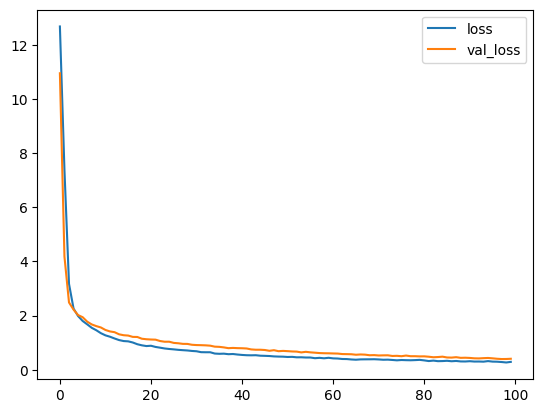

In [194]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)), #l2 regularization is applied to further prevent overfitting
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),    
    layers.Dense(1),
])


optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae')

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=32,
    epochs=100,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

The model with the most accurate results became XGBRegressor